In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from nilearn import plotting
import nibabel as nib
import os
import seaborn as sns
from scipy import stats


### Visualize Registered Images Significance Bitmaps for FreeSurfer
*Same code can be reused for SynthMorph*

/home/ines/.local/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


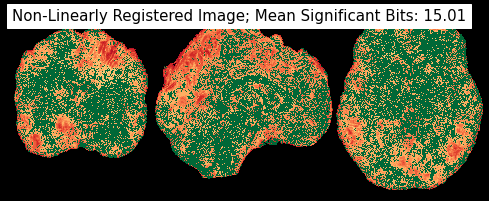

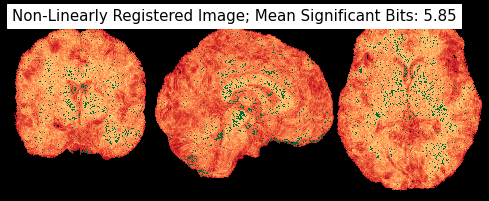

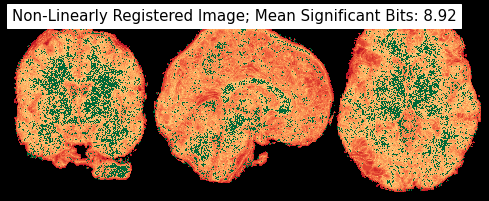

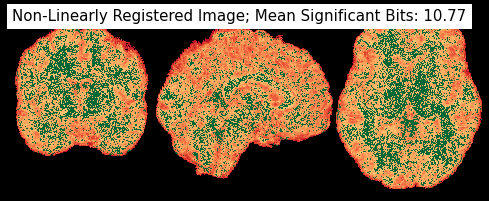

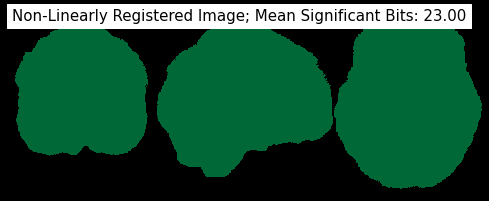

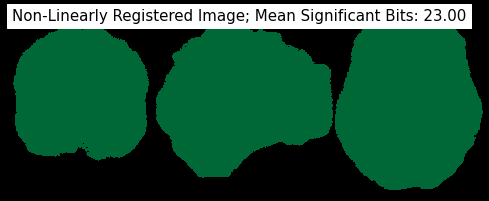

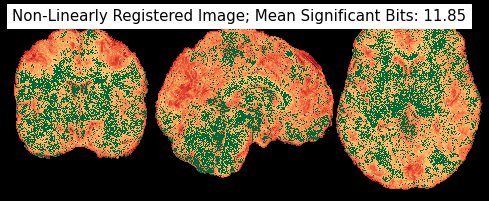

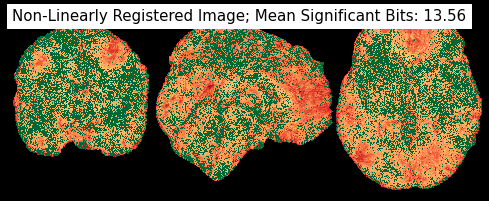

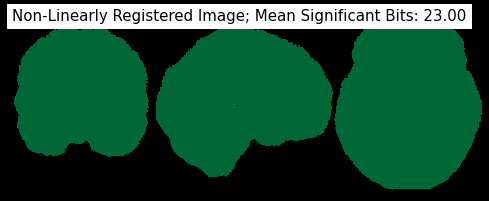

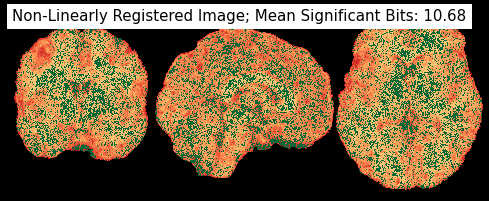

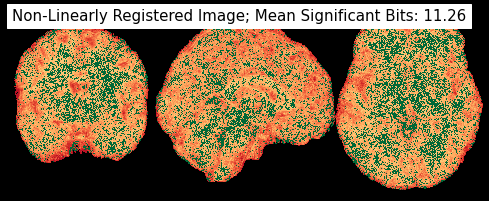

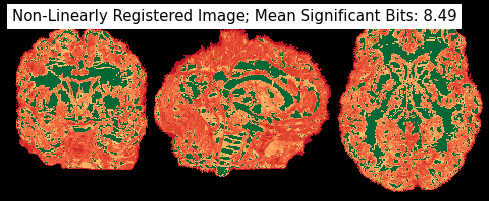

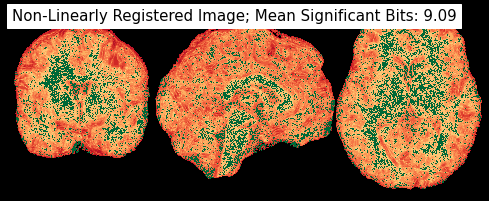

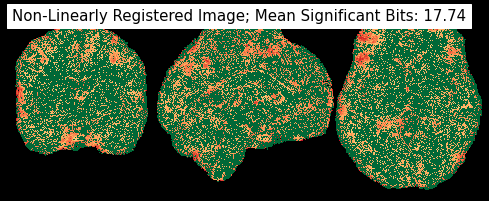

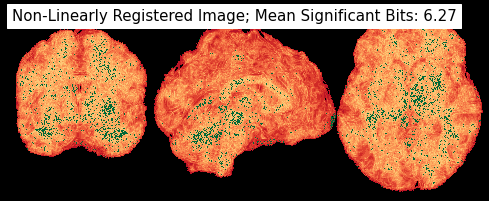

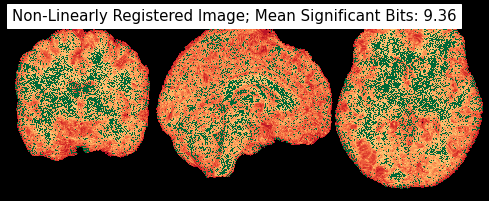

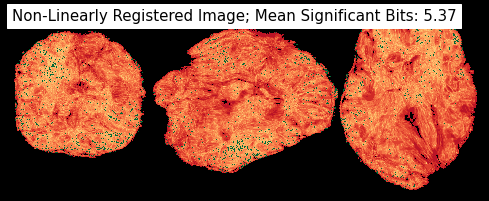

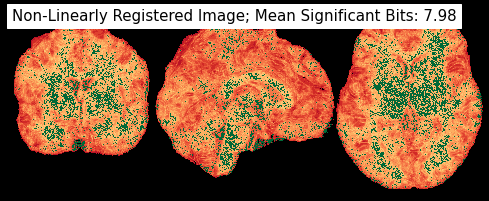

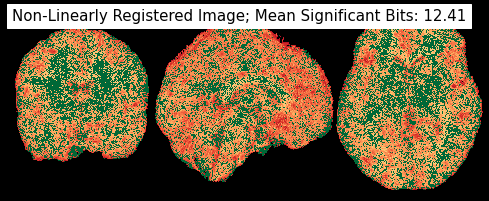

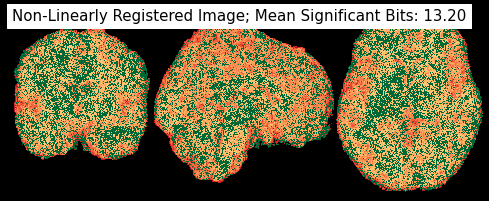

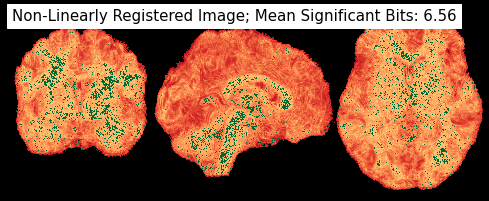

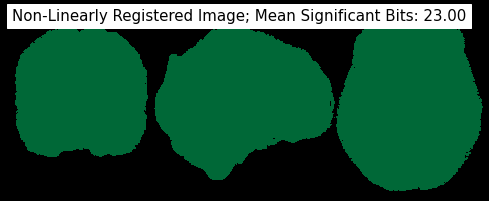

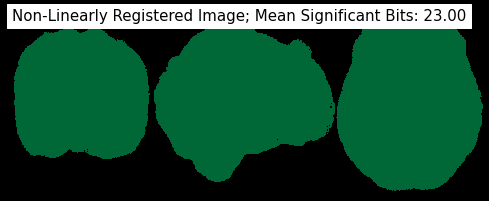

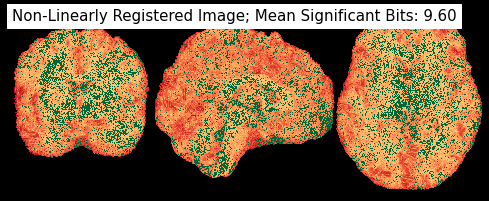

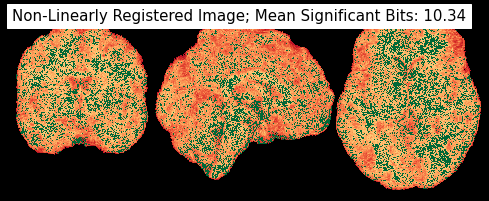

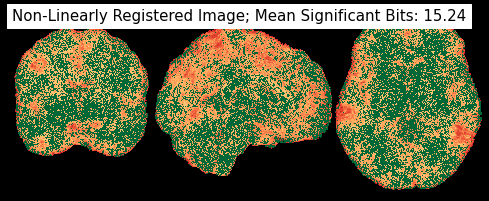

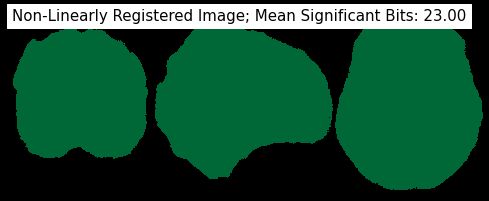

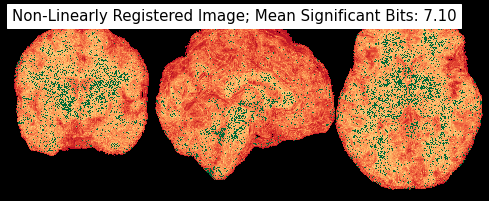

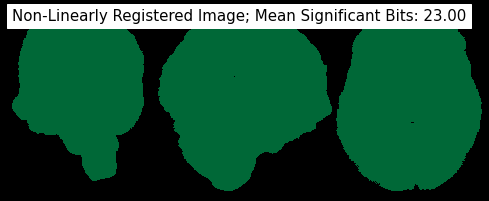

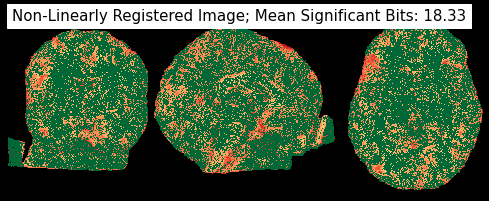

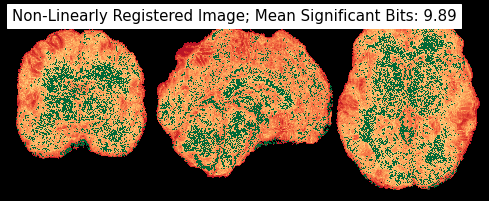

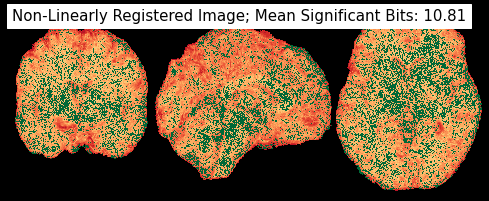

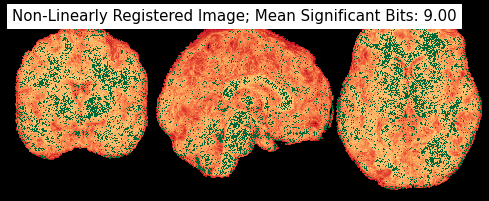

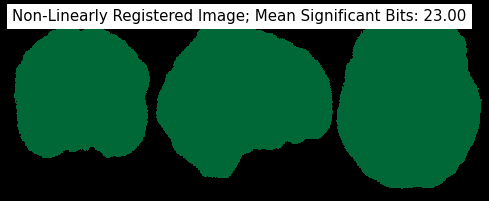

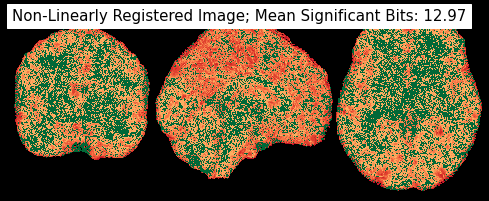

In [2]:
subjects = os.listdir('FreeSurfer/fuzzy_libmath')
for subject in subjects:
    if 'ieee' in subject or 'sig' in subject or 'img' in subject or 'color' in subject: continue
    img_nl = nib.load(f"FreeSurfer/fuzzy_libmath/{subject}/reg_1.mgz")
    sig = np.load(f"FreeSurfer/fuzzy_libmath/{subject}/nonlinear_fuzzy.npy")
    
    img = nib.nifti1.Nifti1Image(sig, img_nl.affine) 

    if list(set(list(sig[sig != 0])))[0] == 23.:
        display = plotting.plot_img(img, cut_coords=(0,0,0), annotate=False, draw_cross=False, black_bg=True, threshold=0, bg_img=None,cmap='RdYlGn_r',colorbar=False) 
    else:
        display = plotting.plot_img(img, cut_coords=(0,0,0), annotate=False, draw_cross=False, black_bg=True, threshold=0, bg_img=None,cmap='RdYlGn',colorbar=False, vmin=0, vmax=23) 
    display.title(f"Non-Linearly Registered Image; Mean Significant Bits: {np.mean(sig[sig != 0]):.2f}", size=15)
#     display.savefig(f"FreeSurfer/fuzzy_libmath/reg_sig/{subject}_sigmap.png")
    

### Visualize Warp Fields Significance Bitmaps for FreeSurfer
*Same code can be reused for SynthMorph*

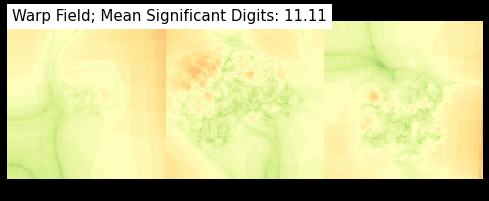

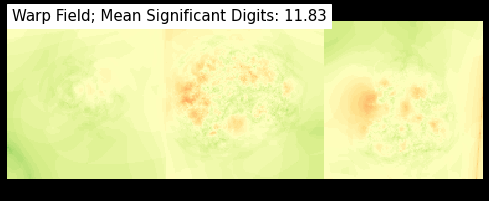

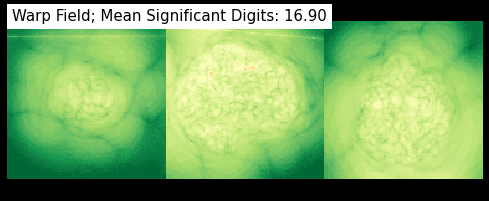

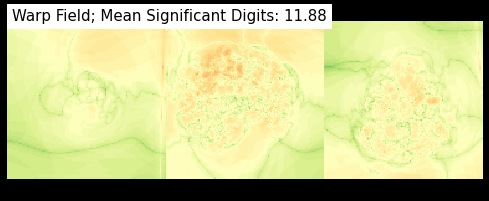

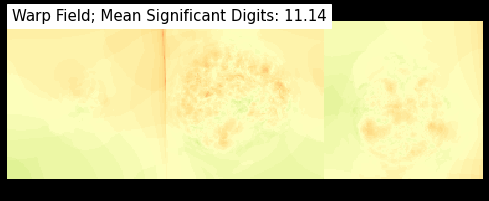

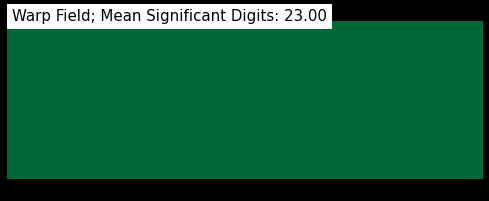

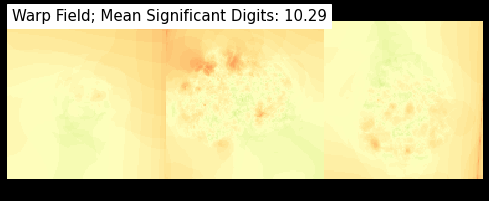

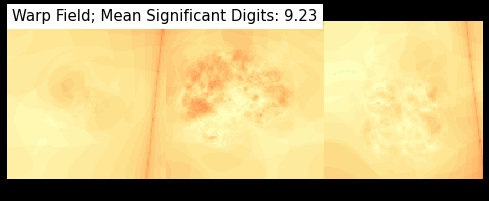

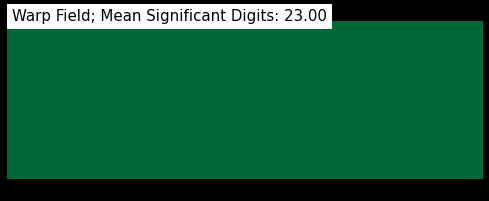

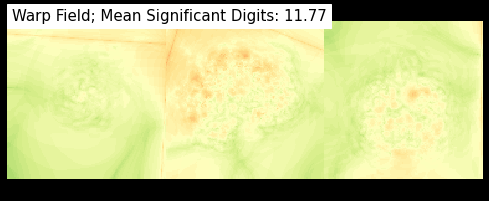

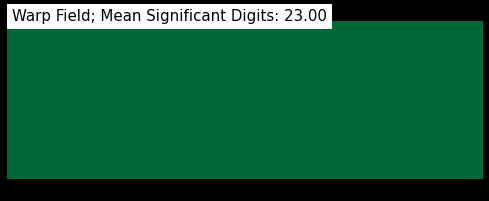

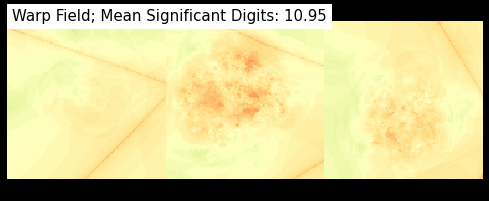

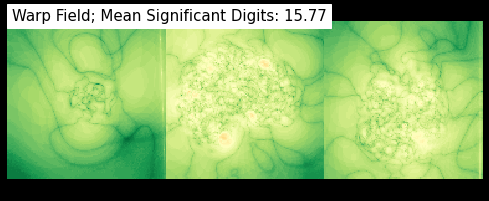

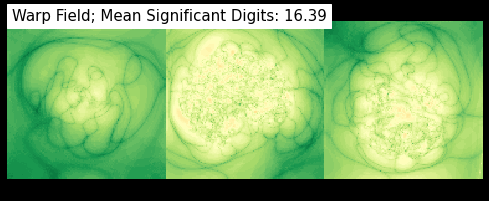

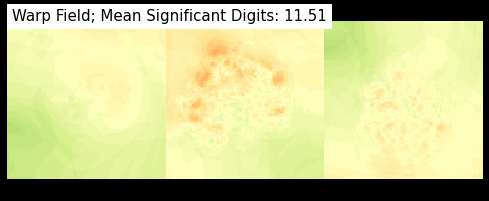

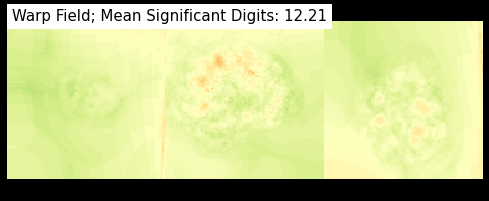

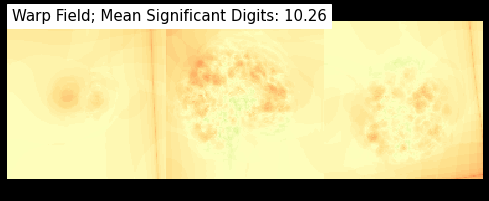

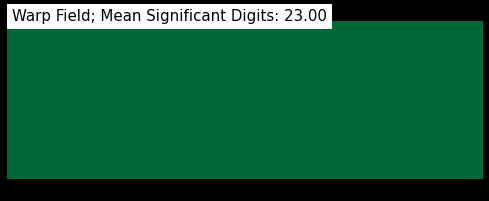

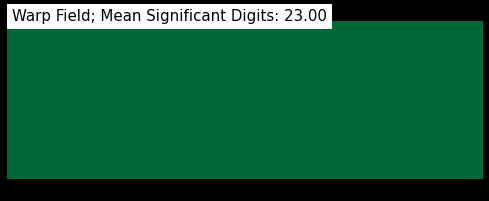

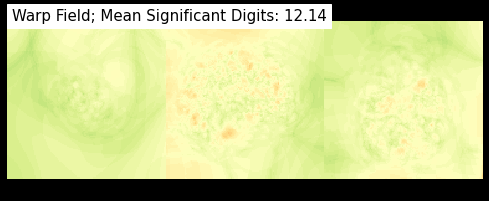

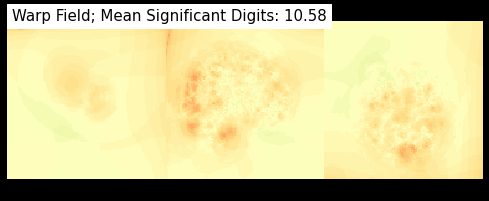

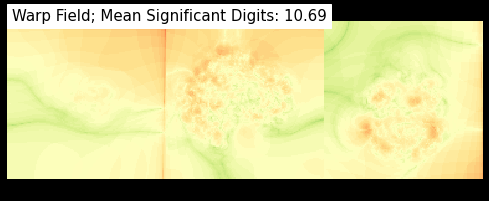

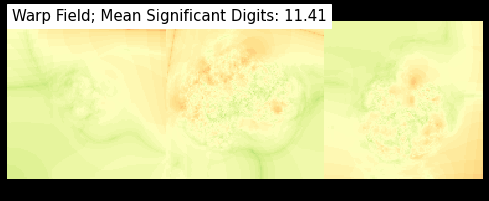

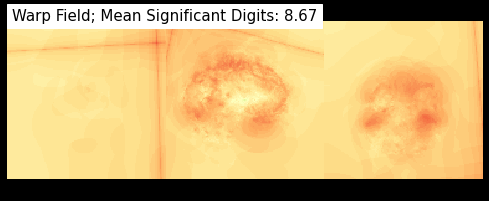

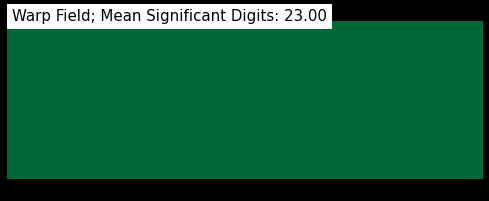

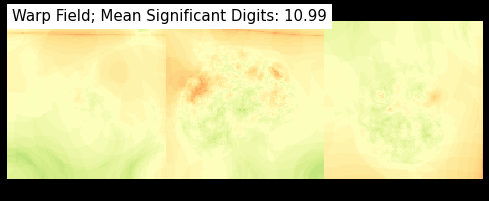

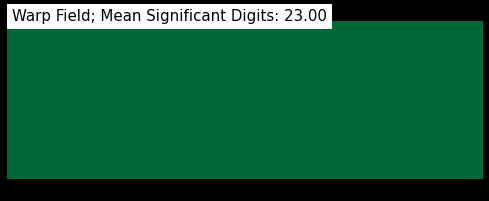

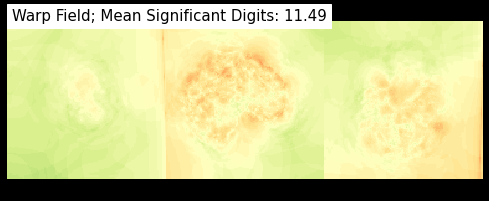

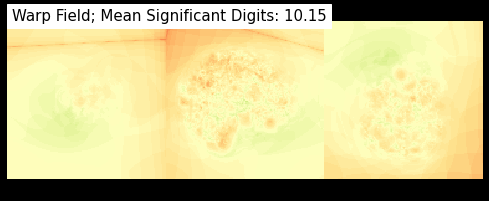

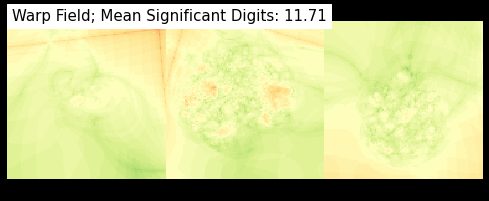

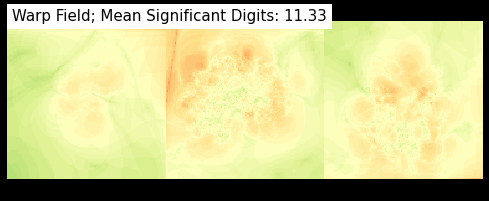

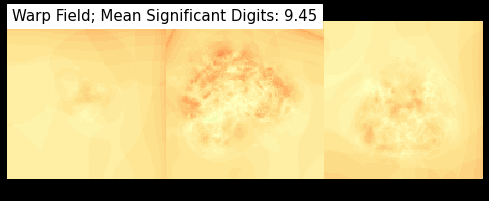

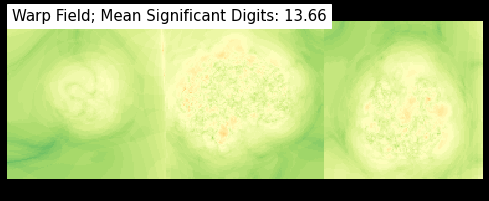

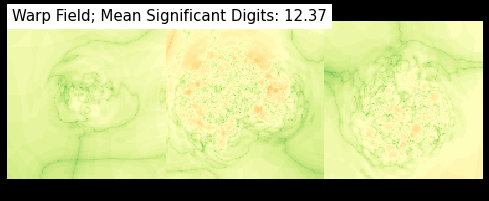

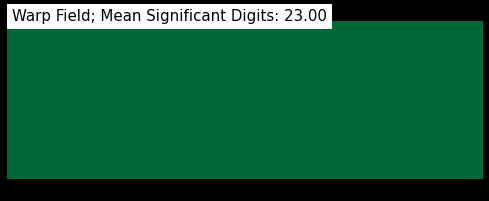

In [3]:
for warp in os.listdir('FreeSurfer/fuzzy_libmath/warp_sigmaps'):
    subject = warp.split('_')[0]
    
    img = nib.load(f"FreeSurfer/fuzzy_libmath/{subject}/reg_1.mgz")
    sig = np.load(f"FreeSurfer/fuzzy_libmath/warp_sigmaps/{subject}_warp_dest.npy")
    sig = ((sig[:,:,:,0] + sig[:,:,:,1] + sig[:,:,:,2])/3)
    
    
    img = nib.nifti1.Nifti1Image(sig, img.affine) 

    display = plotting.plot_img(img, cut_coords=(64,-25,44), annotate=False, black_bg=True, draw_cross=False, bg_img=None,cmap='RdYlGn',colorbar=False, vmin=0, vmax=23) 
    display.title(f"Warp Field; Mean Significant Digits: {np.mean(sig[sig != 0]):.2f}", size=15)
#     display.savefig(f"FreeSurfer/fuzzy_libmath/warp_sig/{subject}_sigmap.png")


## Boxplot for FreeSurfer vs SynthMorph

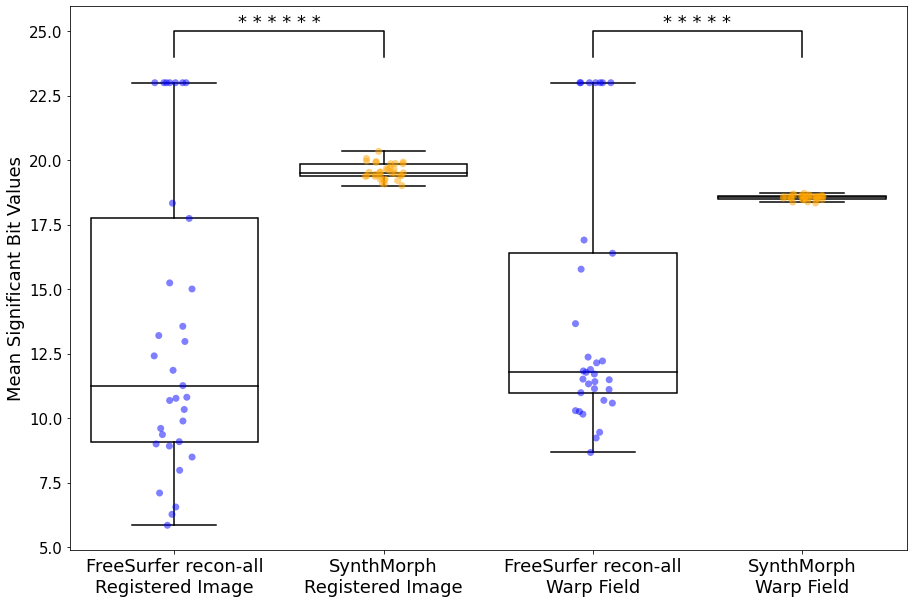

In [5]:
PROPS = {
        'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'black'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}
    }

sm_reg = {'sub-0025930': 19.369220927108255, 'sub-2842950': 19.489300820470078, 'sub-0027012': 19.85807101291216,
          'sub-0025555': 19.52655566716383, 'sub-0026044': 19.960689927744053, 'sub-0025436': 19.0928604528606, 
          'sub-0025531': 19.676332317328352, 'sub-0025604': 19.627379608880634, 'sub-0025507': 19.651573747056613,
          'sub-0027191': 19.9466517106706, 'sub-0026175': 19.372955552079016, 'sub-0025011': 19.27366739863679,
          'sub-0027268': 19.47879508463422, 'sub-0025362': 19.07257801381513, 'sub-0026196': 19.012928989509504,
          'sub-0025350': 19.379602087846408, 'sub-0025631': 19.698734848418678, 'sub-0027236': 19.205501619021238,
          'sub-0025879': 19.52937161268739, 'sub-0003002': 19.398116552489, 'sub-0027094': 19.39702554523797, 'sub-0026055': 19.228002939191047,
          'sub-0027294': 19.541793194800896, 'sub-0027393': 18.623802040706224, 'sub-0025406': 19.440643096543013,
          'sub-0025598': 19.41752195486631, 'sub-0027214': 19.862030430330364, 'sub-0025462': 19.910718782803674, 
          'sub-0027110': 19.26516046178126, 'sub-0025993': 20.067426701084315, 'sub-0026036': 20.33949437779376, 
          'sub-0025248': 19.507476124860826, 'sub-0026017': 19.870619211729554, 'sub-0027174': 19.92276196558438, 'sub-0027434': 19.160500882263463}

sm_warp = {'sub-0025930': 18.507677641369064, 'sub-2842950': 18.586138237847234, 'sub-0027012': 18.584692189050113,
           'sub-0025555': 18.466505311027397, 'sub-0026044': 18.598077973865355, 'sub-0025436': 18.464064631386417,
           'sub-0025531': 18.58759300595238, 'sub-0025604': 18.52362821064297, 'sub-0025507': 18.646572972857754,
           'sub-0027191': 18.586483425564246, 'sub-0026175': 18.543544950939378, 'sub-0025011': 18.687423706054695,
           'sub-0027268': 18.574266754634777, 'sub-0025362': 18.60602232917906, 'sub-0026196': 18.47500479561944,
           'sub-0025350': 18.337448265438965, 'sub-0025631': 18.575326877170134, 'sub-0027236': 18.587327793666265,
           'sub-0025879': 18.566773768833702, 'sub-0003002': 18.598920162140384, 'sub-0027094': 18.601042732359858,
           'sub-0026055': 18.655535646468863, 'sub-0027294': 18.71407940576946, 'sub-0027393': 18.561829388330864,
           'sub-0025406': 18.461656746031757, 'sub-0025598': 18.630091785249235, 'sub-0027214': 18.52589300246467,
           'sub-0025462': 18.371774098229807, 'sub-0027110': 18.51666443839905, 'sub-0025993': 18.620365542457225,
           'sub-0026036': 18.381801835317486, 'sub-0025248': 18.564420136951266, 'sub-0026017': 18.493579682849695,
           'sub-0027174': 18.65092681400359, 'sub-0027434': 18.47531394352988}

fs_reg = {'sub-0025604': 15.005388508359077, 'sub-0026196': 5.846457213878657, 'sub-0026017': 8.918379766205852, 
          'sub-0025993': 10.769144760190507, 'sub-0025462': 23.0, 'sub-0025631': 23.0, 'sub-0025531': 11.853142548864518, 
          'sub-0025362': 13.558726142148151, 'sub-0025598': 23.0, 'sub-0025436': 10.684209656132898, 'sub-0025248': 11.260411153385373, 
          'sub-0026036': 8.491517084600082, 'sub-0025879': 9.087371203660338, 'sub-0003002': 17.73971650371412, 
          'sub-0026044': 6.271014907991904, 'sub-0025350': 9.36247095733503, 'sub-0027393': 5.374403595956109, 'sub-0027294': 7.978348288702006, 
          'sub-0025011': 12.412603668677889, 'sub-0027110': 13.201163426026728, 'sub-0027174': 6.555800093688536,
          'sub-2842950': 23.0, 'sub-0027094': 23.0, 'sub-0025930': 9.60203884146283, 'sub-0025555': 10.335235132832166,
          'sub-0027191': 15.241092108290513, 'sub-0025406': 23.0, 'sub-0027268': 7.098026186315213, 'sub-0027434': 23.0, 
          'sub-0026055': 18.331364768588333, 'sub-0027214': 9.887641061855172, 'sub-0026175': 10.81011759446143,
          'sub-0025507': 8.99818740458033, 'sub-0027236': 23.0, 'sub-0027012': 12.97043457392254}

fs_warp = {'sub-0025604': 11.111617406209316, 'sub-0025930': 11.828108310699465, 'sub-0003002': 16.9018219312032,
           'sub-0027012': 11.884184996287033, 'sub-0026017': 11.141535441080727, 'sub-0025598': 23.0, 
           'sub-0027214': 10.289360046386713, 'sub-0027174': 9.230409781138103, 'sub-0025462': 23.0, 'sub-0025555': 11.77497355143229, 
           'sub-0025631': 23.0, 'sub-0027393': 10.947532335917158, 'sub-0026055': 15.773342132568368, 'sub-0027110': 16.39030901590984, 
           'sub-0025507': 11.51260312398275, 'sub-0027191': 12.214621067047117, 'sub-0027294': 10.255521456400551,
           'sub-2842950': 23.0, 'sub-0027094': 23.0, 'sub-0025248': 12.14238802591959, 'sub-0026196': 10.58164358139038,
           'sub-0025879': 10.689826806386318, 'sub-0026175': 11.41484228769938, 'sub-0026036': 8.66817458470662,
           'sub-0027236': 23.0, 'sub-0025531': 10.985963026682525, 'sub-0025406': 23.0, 'sub-0027268': 11.488347212473553,
           'sub-0025993': 10.153450489044188, 'sub-0025362': 11.710281531016037, 'sub-0025350': 11.325921376546225,
           'sub-0026044': 9.45107078552246, 'sub-0025436': 13.661711692810051, 'sub-0025011': 12.366050879160563, 'sub-0027434': 23.0}

#EXCLUDE: 27393 + 27434 - QC FAIL
del fs_reg['sub-0027434']
del fs_warp['sub-0027434']
del sm_reg['sub-0027434']
del sm_warp['sub-0027434']

del fs_reg['sub-0027393']
del fs_warp['sub-0027393']
del sm_reg['sub-0027393']
del sm_warp['sub-0027393']

plt.figure(figsize=(15,10))
sns.boxplot(data=[list(fs_reg.values()), list(sm_reg.values()), list(fs_warp.values()), list(sm_warp.values())], showfliers = False, **PROPS)
g = sns.stripplot(data=[list(fs_reg.values()), list(sm_reg.values()), list(fs_warp.values()), list(sm_warp.values())], palette=['blue', 'orange', 'blue', 'orange'], alpha=0.5, size=7)

g.set_xticklabels(['FreeSurfer recon-all\nRegistered Image', 'SynthMorph\nRegistered Image', 'FreeSurfer recon-all\nWarp Field', 'SynthMorph\nWarp Field'], fontsize=18)

g.set_ylabel('Mean Significant Bit Values', fontsize=18)
g.text((1)*.5, 25, "* * * * * *", ha='center', va='bottom', size=18) #1.00 * 10^-6
plt.plot([0, 0, 1, 1], [24, 25, 25, 24], lw=1.5, c='black')
plt.yticks(fontsize=15)

g.text((5)*.5, 25, "* * * * *", ha='center', va='bottom', size=18) #1.54 * 10^-5
plt.plot([2, 2, 3, 3], [24, 25, 25, 24], lw=1.5, c='black');

# g.text(0.3,6.75, f"Registered Image P-value:\n{stats.ttest_rel(list(fs_reg.values()), list(sm_reg.values()))[1]}", size=12)
# g.text(2.3,6.75, f"Warp Field P-value:\n{stats.ttest_rel(list(fs_warp.values()), list(sm_warp.values()))[1]}", size=12)
# plt.savefig('FreeSurfer/fs_sm_boxplot.png');